In [1]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results'
ctgr = [f for f in os.listdir(resDir) if '.pkl' not in f]
# ctgr = os.listdir(resDir)
genelist = ['HMGCS1', 'TOP2A', 'DNAJB1', 'PCNA', 'HMOX1']
celllist = ['A549', 'MCF7', 'PC3']
steplist = [5, 10]
querylist = {
    "naiveUncertainty1": 'LeastConfidence',
    "naiveUncertainty2": 'LeastConfidence',
    "KMeans": 'KMeansSampling',
}

## Deliver the averaged F1 comparison of different step size and query strategies.

In [3]:
dictData = {key:{} for key in ctgr}
for q in ctgr:
    print(q)
    dictQ = dictData[q]
    for s in steplist:
        print(s)
        dictQ[s] = []
        for c in celllist:
            # print(c)
            mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/{q}/LINCS_{c}_{querylist[q]}_{s}_0_30.pkl'
            try:
                with open(mtcPath, 'rb') as f:
                    all_acc,all_f1 = pickle.load(f)
            except:
                continue
            all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
            # extract the last cycle f1
            all_f1 = np.array(all_f1)[:, -1, :]
            # average of genes
            f1 = np.mean(all_f1, axis=1)
            # print(f"{c}  Mean: {f1.mean():.3f}, Std: {f1.std():.3f}")
            print(f"{c}: {f1.mean():.3f}")
            dictQ[s].append(f1)
        # print(np.array(dictQ[s]))
        tmp = np.mean(np.array(dictQ[s]), axis=0)
        # print(tmp)
        dictQ[s] = (round(tmp.mean(),3), round(tmp.std(),3))

naiveUncertainty1
5
A549: 0.402
MCF7: 0.364
PC3: 0.415
10
A549: 0.382
MCF7: 0.363
PC3: 0.410
naiveUncertainty2
5
A549: 0.390
MCF7: 0.343
PC3: 0.382
10
A549: 0.384
MCF7: 0.372
PC3: 0.385
KMeans
5
A549: 0.388
MCF7: 0.359
PC3: 0.410
10
A549: 0.377
MCF7: 0.354
PC3: 0.410


In [4]:
print(dictData)
pd.DataFrame.from_dict(dictData)

{'naiveUncertainty1': {5: (0.394, 0.0), 10: (0.385, 0.0)}, 'naiveUncertainty2': {5: (0.372, 0.0), 10: (0.38, 0.0)}, 'KMeans': {5: (0.385, 0.004), 10: (0.38, 0.008)}}


,naiveUncertainty1,naiveUncertainty2,KMeans
5,"(0.394, 0.0)","(0.372, 0.0)","(0.385, 0.004)"
10,"(0.385, 0.0)","(0.38, 0.0)","(0.38, 0.008)"


## Deliver the F1 curve example.

5
naiveUncertainty1
A549
MCF7
PC3
naiveUncertainty2
A549
MCF7
PC3
KMeans
A549
MCF7
PC3


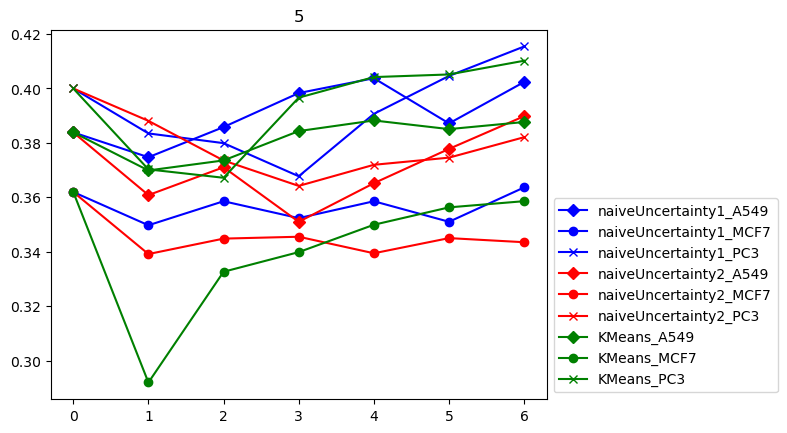

10
naiveUncertainty1
A549
MCF7
PC3
naiveUncertainty2
A549
MCF7
PC3
KMeans
A549
MCF7
PC3


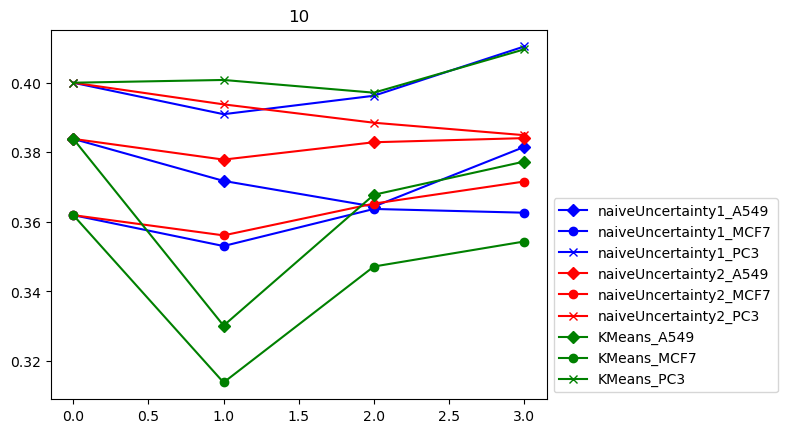

In [5]:
dictData = {key:{} for key in steplist}
for s in steplist:
    print(s)
    dictS = dictData[s]
    dots = {
        "A549": 'D-',
        "MCF7": 'o-',
        "PC3": 'x-',
    }
    clrs = {
        'naiveUncertainty1': 'b', 
        'naiveUncertainty2': 'r', 
        'KMeans': 'g'
    }
    rds = int(30/s + 1)
    for q in ctgr:
        print(q)
        dictS[q] = []
        for c in celllist:
            print(c)
            mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/{q}/LINCS_{c}_{querylist[q]}_{s}_0_30.pkl'
            try:
                with open(mtcPath, 'rb') as f:
                    all_acc,all_f1 = pickle.load(f)
            except:
                continue
            all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
            # plt.subplots(figsize=(2, 2))
            # average of random
            all_f1 = np.mean(all_f1, axis=0)
            # [plt.plot(np.arange(0, 3, 1), all_f1[:,i], label=genelist[i]) for i in range(5)]
            # average of genes
            f1 = np.mean(all_f1, axis=1)
            # print(f1)
            # plt.plot(np.arange(0, 3, 1), f1, label='average')
            # plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
            # plt.title(f'{q}_{s}_{c}')
            # plt.show()
            dictS[q].append(f1)  
        [plt.plot(np.arange(0, rds, 1), dictS[q][i], f'{clrs[q]}{dots[celllist[i]]}',label=f'{q}_{celllist[i]}') for i in range(3)]
    plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
    plt.title(f'{s}')
    plt.show()

5
naiveUncertainty1
A549
MCF7
PC3
naiveUncertainty2
A549
MCF7
PC3
KMeans
A549
MCF7
PC3


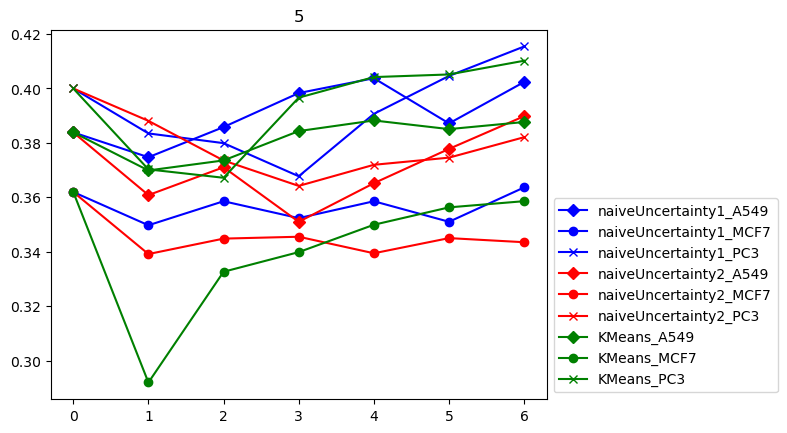

10
naiveUncertainty1
A549
MCF7
PC3
naiveUncertainty2
A549
MCF7
PC3
KMeans
A549
MCF7
PC3


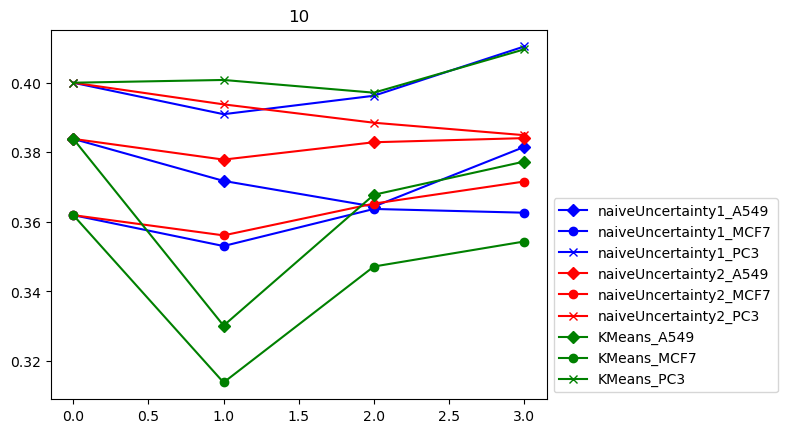

In [6]:
dictData = {key:{} for key in steplist}
for s in steplist:
    print(s)
    dictS = dictData[s]
    dots = {
        "A549": 'D-',
        "MCF7": 'o-',
        "PC3": 'x-',
    }
    clrs = {
        'naiveUncertainty1': 'b', 
        'naiveUncertainty2': 'r', 
        'KMeans': 'g'
    }
    rds = int(30/s + 1)
    for q in ctgr:
        print(q)
        dictS[q] = []
        for c in celllist:
            print(c)
            mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/{q}/LINCS_{c}_{querylist[q]}_{s}_0_30.pkl'
            try:
                with open(mtcPath, 'rb') as f:
                    all_acc,all_f1 = pickle.load(f)
            except:
                continue
            all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
            # plt.subplots(figsize=(2, 2))
            # average of random
            all_f1 = np.mean(all_f1, axis=0)
            # [plt.plot(np.arange(0, 3, 1), all_f1[:,i], label=genelist[i]) for i in range(5)]
            # average of genes
            f1 = np.mean(all_f1, axis=1)
            # print(f1)
            # plt.plot(np.arange(0, 3, 1), f1, label='average')
            # plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
            # plt.title(f'{q}_{s}_{c}')
            # plt.show()
            dictS[q].append(f1)  
        [plt.plot(np.arange(0, rds, 1), dictS[q][i], f'{clrs[q]}{dots[celllist[i]]}',label=f'{q}_{celllist[i]}') for i in range(3)]
    plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
    plt.title(f'{s}')
    plt.show()